In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [4]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"
segmentDir = "../data/output/segment/"

In [45]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]
df6 = pd.read_csv(segmentDir + "result.csv")
df6.columns = [["id", "segmentSize"]]

In [48]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")
df = pd.merge(df, df6, on="id")

In [49]:
mf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
mf = mf[["red", "brake", "accel", "steeringPositive",  "steeringNegative", "segmentSize"]]
mf.columns = ["red", "brake", "accel", "steeringPositive",  "steeringNegative", "segmentSize"]

# Summation of all statuses and calculate risk

In [50]:
rows = mf.as_matrix()
mf["sum"] = [np.sum(rows[i][:-1]) for i in range(len(rows))]

In [51]:
mf["risk"] = mf["sum"] / mf["segmentSize"]

In [52]:
mf.describe()

,red,brake,accel,steeringPositive,steeringNegative,segmentSize,sum,risk
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,40.561856,59.819588,45.886598,69.077320,360.510309,239.974227,0.689298
std,42.578259,58.297600,73.636859,102.050874,199.483632,443.529581,337.707625,0.409653
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,8.250000,1.000000,0.000000,76.750000,37.500000,0.379399
50%,3.000000,15.000000,23.000000,2.000000,2.000000,252.500000,133.500000,0.611618
75%,26.750000,55.000000,89.500000,25.500000,23.750000,407.250000,270.750000,0.856552
max,188.000000,321.000000,389.000000,527.000000,1460.000000,2565.000000,1921.000000,2.000000


In [188]:
top5 = mf[mf["sum"] > 30].sort_values("risk", ascending=False)[:5]
top5 = top5[["red", "brake", "accel", "steeringNegative", "steeringPositive", "sum"]]

for key in top5.columns:
    if key == "sum":
        continue
    top5[key] = top5[key] / top5["sum"]

top5 = top5[["red", "brake", "accel", "steeringNegative", "steeringPositive"]]
top5Index = top5.index

In [189]:
top5Index

Int64Index([1332, 1337, 632, 1289, 182], dtype='int64')

(0, 1)

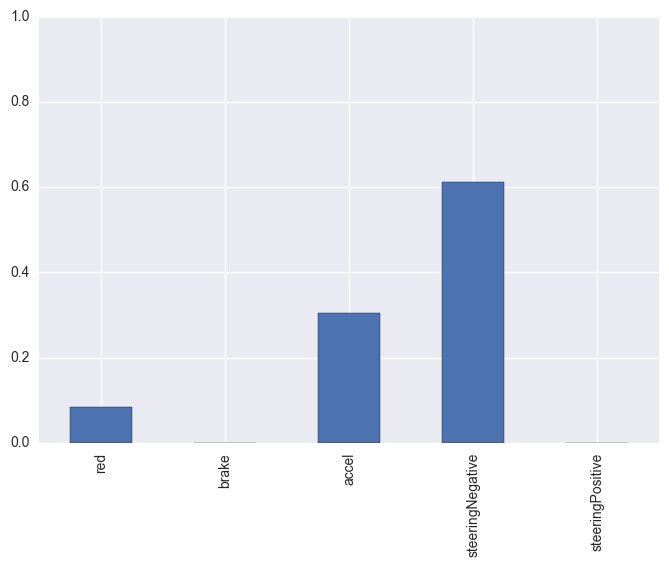

In [191]:
top5.ix[top5Index[0]].plot(kind='bar')
plt.ylim(0, 1)

(0, 1)

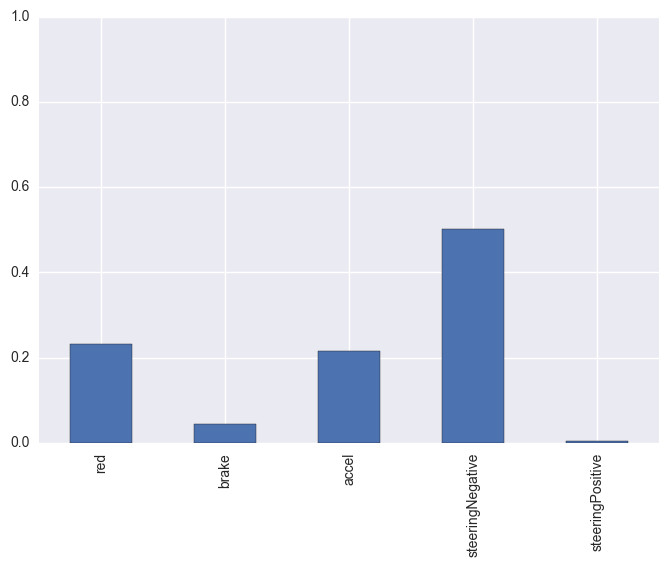

In [193]:
top5.ix[top5Index[1]].plot(kind='bar')
plt.ylim(0, 1)

(0, 1)

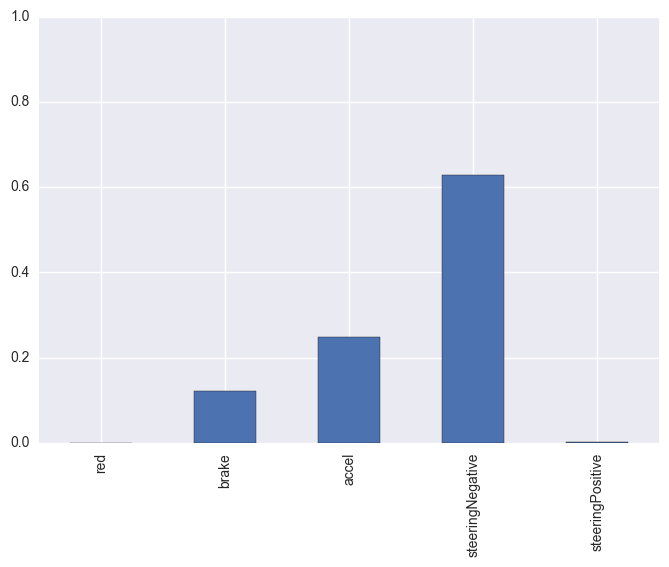

In [194]:
top5.ix[top5Index[2]].plot(kind='bar')
plt.ylim(0, 1)

(0, 1)

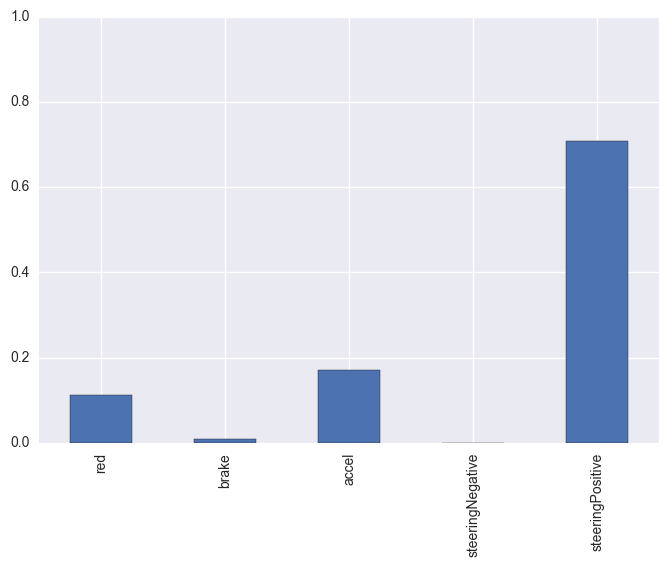

In [195]:
top5.ix[top5Index[3]].plot(kind='bar')
plt.ylim(0, 1)

(0, 1)

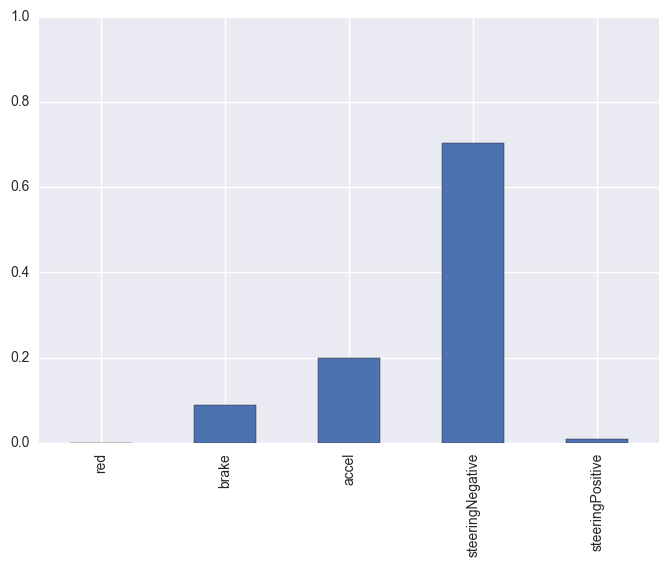

In [196]:
top5.ix[top5Index[4]].plot(kind='bar')
plt.ylim(0, 1)

# Save

In [152]:
pred = zip(mf.index, mf["risk"])
gridSize = len(df)
result = np.zeros(gridSize)

for index, risk in pred:
    result[index] = risk
    
np.savetxt(targetDir + "clusters8.csv", result, delimiter=",", fmt="%f")

# Risk graph order by index

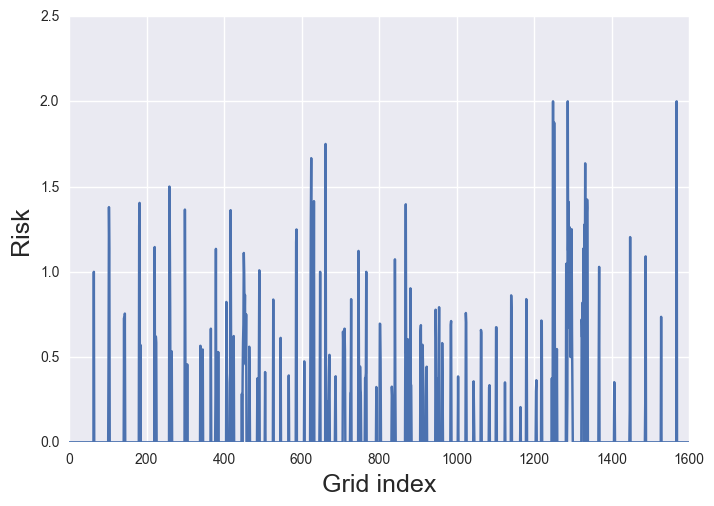

In [172]:
plt.plot(result)
plt.ylim(0, 2.5)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

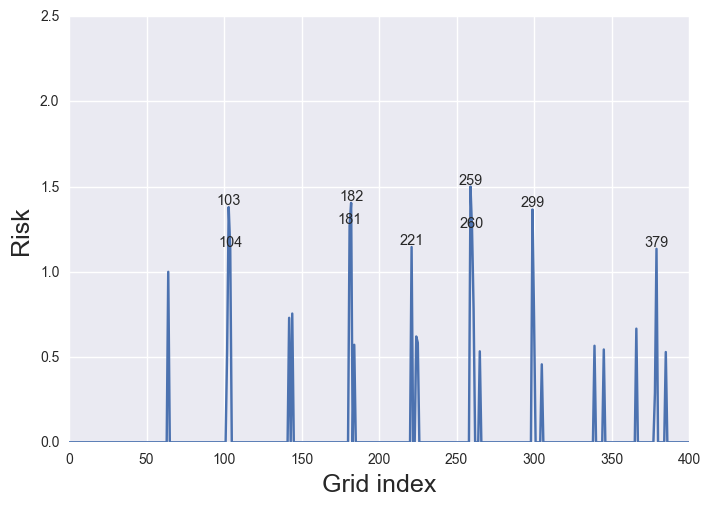

In [178]:
plt.plot(result)

for x, y in enumerate(result):
    if y > 1.0 and x <= 400:
        plt.text(x, y, x, ha='center', va='bottom', size="xx-small")

plt.ylim(0, 2.5)
plt.xlim(0, 400)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

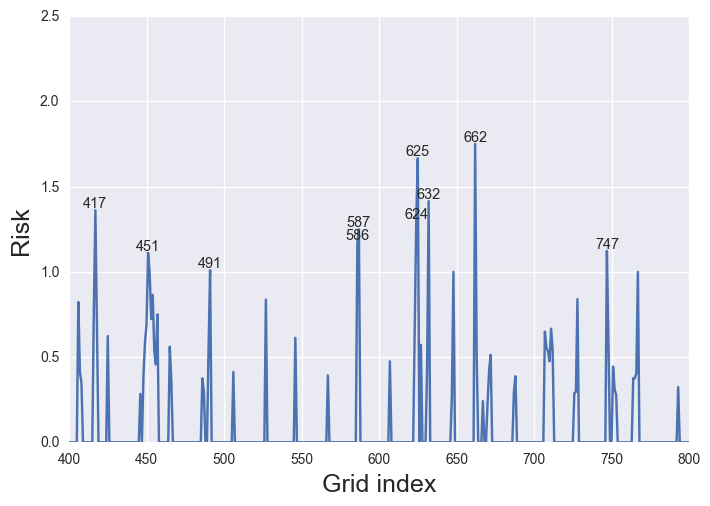

In [177]:
plt.plot(result)

for x, y in enumerate(result):
    if y > 1.0 and x > 400 and x <= 800:
        plt.text(x, y, x, ha='center', va='bottom', size="xx-small")

plt.ylim(0, 2.5)
plt.xlim(400, 800)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

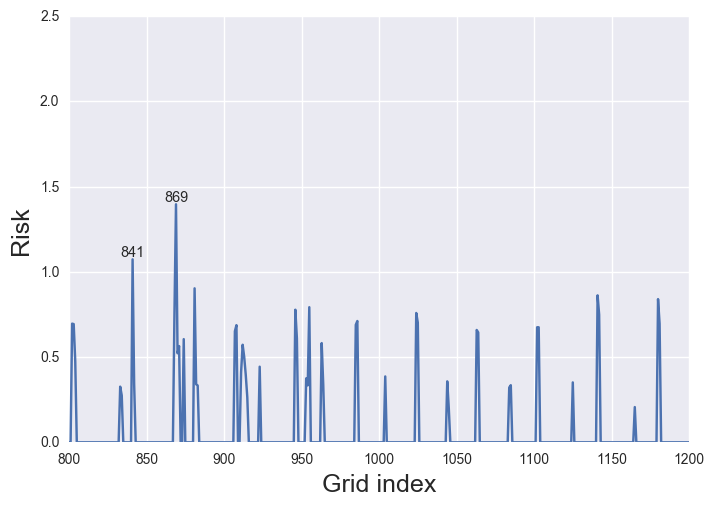

In [179]:
plt.plot(result)

for x, y in enumerate(result):
    if y > 1.0 and x > 800 and x < 1200:
        plt.text(x, y, x, ha='center', va='bottom', size="xx-small")

plt.ylim(0, 2.5)
plt.xlim(800, 1200)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

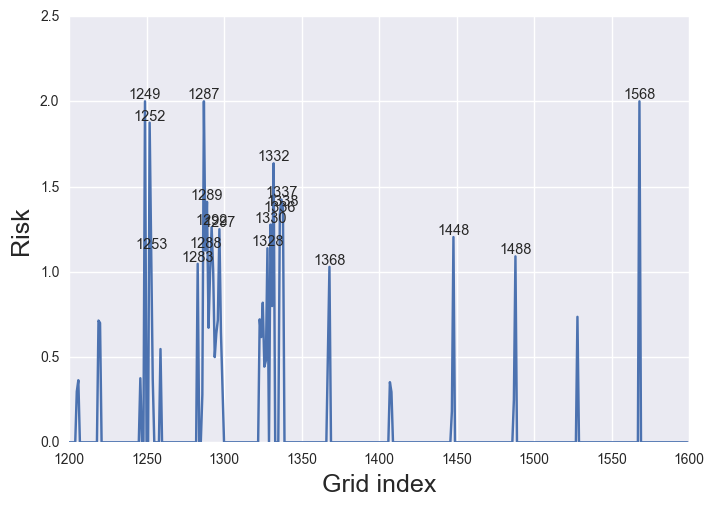

In [176]:
plt.plot(result)

for x, y in enumerate(result):
    if y > 1.0 and x > 1200 and x <= 1600:
        plt.text(x, y, x, ha='center', va='bottom', size="xx-small")

plt.ylim(0, 2.5)
plt.xlim(1200, 1600)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

# Risk graph order by route

In [118]:
route = pd.read_csv("../data/working/route.csv", header=None)
route.columns = [["index", "frame"]]

In [119]:
tmp = pd.DataFrame([(i, v) for i, v in enumerate(result)])
tmp.columns = [["index", "risk"]]

In [147]:
rf = pd.merge(route, tmp, on="index")
rf = rf[rf["frame"] != 0]
rf = rf.sort_values("frame")
rf = rf["risk"]
result = rf.as_matrix()

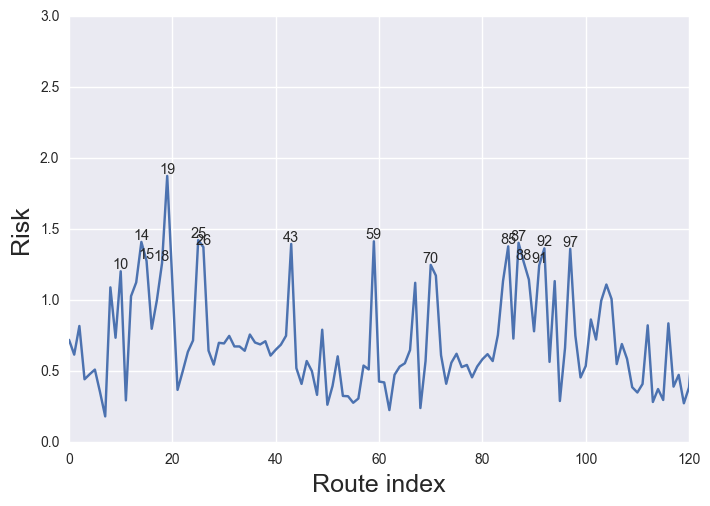

In [150]:
plt.plot(result)

for x, y in enumerate(result):
    if y > 1.2:
        plt.text(x, y, x, ha='center', va='bottom', size="xx-small")
    
plt.ylim(0, 3.0)
plt.xlim(0, 120)
plt.xlabel("Route index", size="medium")
plt.ylabel("Risk", size="medium")